In [53]:
import pandas as pd
import numpy as np
from os import walk, makedirs
import matplotlib.pyplot as plt
from copy import deepcopy
from statistics import mean, stdev

In [54]:
results_dir = '../results'
baseline_charts = {}
fewshot_charts = {}
fewshot_charts_std = {}

#### read baseline data in

In [55]:
baseline_names = ['Bert_embeddings', 'TFidf']
baseline_dict = {}

for name in baseline_names:
  baseline_dict.update({name:pd.read_csv(f"{results_dir}/{name}").sample(frac=1)})

baseline_dict

{'Bert_embeddings':                  model traindata  accuracy  std_accuracy  precision  \
 0           GaussianNB    train4  0.758929      0.100917   0.821506   
 15        RandomForest   train22  0.903274      0.033803   0.906724   
 2           GaussianNB    train2  0.647321      0.132206   0.760729   
 23           LinearSVM    train8  0.877976      0.032907   0.885545   
 29  LogisticRegression    train8  0.879464      0.030929   0.886030   
 11        DecisionTree    train8  0.732143      0.065763   0.737318   
 3           GaussianNB   train22  0.897321      0.031250   0.899549   
 7         DecisionTree   train16  0.735119      0.050178   0.736721   
 31             XGboost   train16  0.888393      0.032192   0.898470   
 25  LogisticRegression   train16  0.912202      0.018042   0.915972   
 8         DecisionTree    train2  0.660714      0.102290   0.664170   
 33             XGboost   train22  0.909226      0.012887   0.915285   
 24  LogisticRegression    train4  0.812500  

#### baseline results dataframe and output to csv

In [56]:
latexCols=["2quads","4quads","8quads","16quads","22quads","28quads"]
modelNames=list()
trainNames=["train2","train4","train8","train16","train22","train28"]

for key, value in baseline_dict.items():
  # print(value.head())
  table_df=pd.DataFrame(columns=latexCols)
  table_df_std=pd.DataFrame(columns=latexCols)
  modelnames = value.model.unique()

  for row in modelnames:
    for i in range(len(latexCols)):
      # print(f"row {row}, col {latexCols[i]}")
      index = value.index[(value['model']==row) & (value['traindata']==trainNames[i])]
      f1 = value.at[index[0], 'f1']
      f1 = round(f1, 2)
      std_f1 = value.at[index[0], 'std_f1']
      std_f1 = round(std_f1, 2)
      table_df.at[row,latexCols[i]] = f1
      table_df_std.at[row,latexCols[i]] = f"{f1}±{std_f1}"

  table_df.to_csv(f"{results_dir}/latex/{key}.csv")
  baseline_charts.update({key: table_df})
  table_df_std.to_csv(f"{results_dir}/latex/{key}_std.csv")

##### read fewshot data in

In [57]:
fewshot_names =['bert-base-multilingual-cased-sentiment-multilingual',
                'dehatebert-mono-french',
                'french_xlm_xnli',
                'xlm-roberta-base-sentiment-multilingual']
fewshot_dict = {}

for name in fewshot_names:
  fewshot_dict.update({name:pd.read_csv(f"{results_dir}/{name}").sample(frac=1)})

# fewshot_dict

#### fewshot results dataframe and output to csv

In [58]:
latexCols=["2quads","4quads","8quads","16quads","22quads","28quads"]
modelNames=list()
trainNames=["train2","train4","train8","train16","train22","train28"]
train_to_quad={}
for i in range(len(trainNames)):
  train_to_quad.update({trainNames[i]:latexCols[i]})
epochs=["1epoch","2epoch","3epoch","4epoch","5epoch"]

for key, value in fewshot_dict.items():
  # print(value.head())
  table_df=pd.DataFrame(columns=latexCols)
  table_df_std=pd.DataFrame(columns=latexCols)

  for epoch in epochs:
    for train in trainNames:
      # print(f"row {row}, col {latexCols[i]}")
      index = value.index[value['traindata']==f"{epoch}_{train}"]
      f1 = value.at[index[0], 'f1']
      f1 = round(f1, 2)
      std_f1 = value.at[index[0], 'std_f1']
      std_f1 = round(std_f1, 2)
      table_df.at[epoch,train_to_quad.get(train)] = f1
      table_df_std.at[epoch,train_to_quad.get(train)] = f"{f1}±{std_f1}"

  table_df.to_csv(f"{results_dir}/latex/{key}.csv")
  fewshot_charts.update({key: table_df})
  table_df_std.to_csv(f"{results_dir}/latex/{key}_std.csv")
  fewshot_charts_std.update({key: table_df_std})

codensed fewshot results

In [59]:
# table_df=pd.DataFrame(columns=latexCols)
allf1=pd.DataFrame(columns=latexCols)

for key, chart in fewshot_charts_std.items():
  rowlist = list()
  for colName in latexCols:
    currCol = chart.loc[:,colName]
    currBest=currCol[0]
    currBestSplit = currBest.split("±")[0]
    for i in range(1, len(currCol)):
      currSplit = currCol[i].split("±")[0]
      if currBestSplit<currSplit:
        currBest=currCol[i]
        currBestSplit=currSplit

    rowlist.append(currBest)
  allf1.loc[key] = rowlist

allf1.to_csv(f"{results_dir}/inLatexDoc/allf1.csv")

##### line graphs for baselines

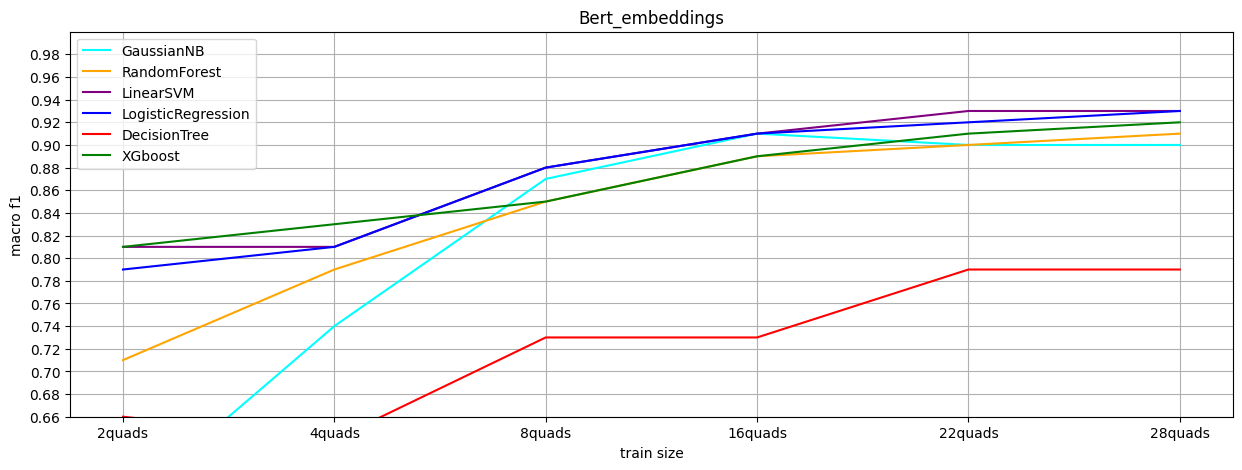

<Figure size 10000x15000 with 0 Axes>

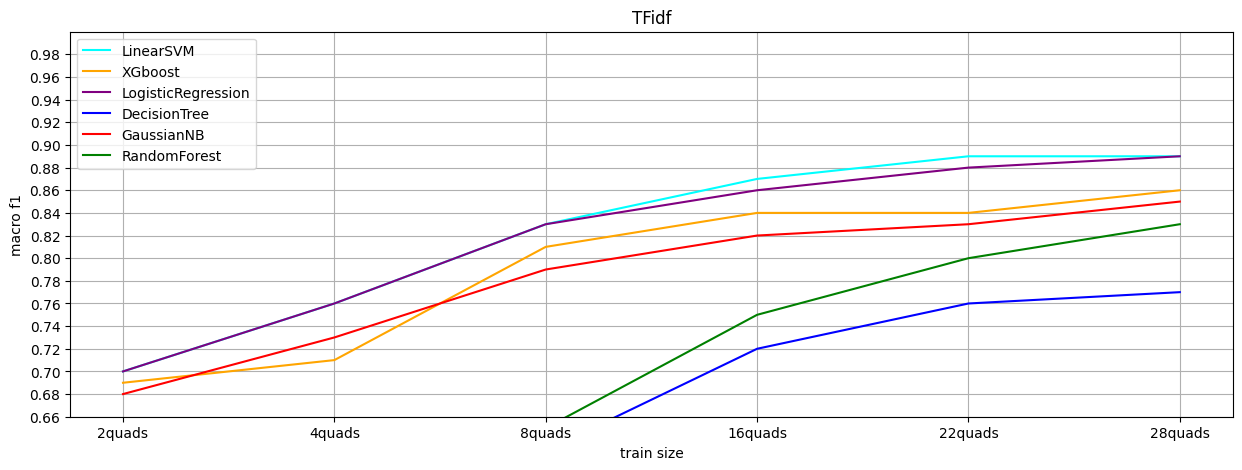

<Figure size 10000x15000 with 0 Axes>

In [60]:
colors = ['aqua','orange','purple','blue','red','green']

for key in baseline_charts.keys():

  plt.figure(figsize=(15, 5))
  plt.grid()
  plt.xlabel("train size")
  # plt.xticks(rotation=90)
  plt.ylabel("macro f1")
  plt.yticks(np.arange(0.66,1.0,0.02))
  plt.ylim(0.66,1.0)
  plt.title(key)

  legend_list = []
  i = 0
  for index, row in baseline_charts.get(key).iterrows():
    legend_list.append(index)
    plt.plot(latexCols,row,"-",color=colors[i])
    i+=1

  plt.legend(legend_list)
  plt.figure(figsize=(100, 150))
  plt.show()


##### line graphs for fewshot

by trainsize

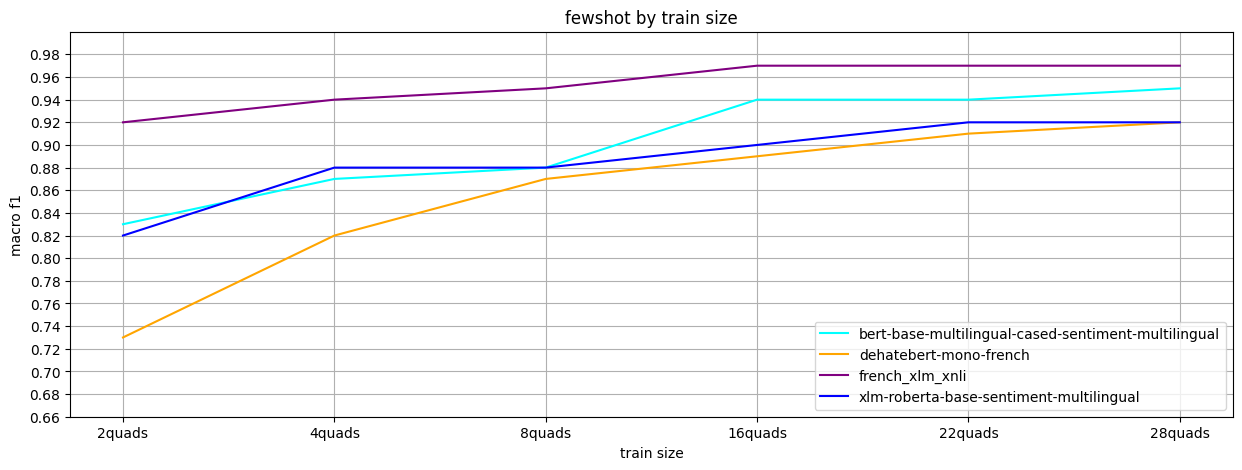

<Figure size 10000x15000 with 0 Axes>

In [61]:
plt.figure(figsize=(15, 5))
plt.xlabel("train size")
plt.ylabel("macro f1")
plt.yticks(np.arange(0.66,1.0,0.02))
plt.ylim(0.66,1.0)
plt.grid()
plt.title("fewshot by train size")
i = 0
legend_list = []
for key, chart in fewshot_charts.items():
  legend_list.append(key)
  rowlist = list()
  for col in latexCols:
    rowlist.append(max(chart.loc[:,col]))

  plt.plot(latexCols,rowlist,"-",color=colors[i])
  i+=1

plt.legend(legend_list)
plt.figure(figsize=(100, 150))
plt.show()

by epoch

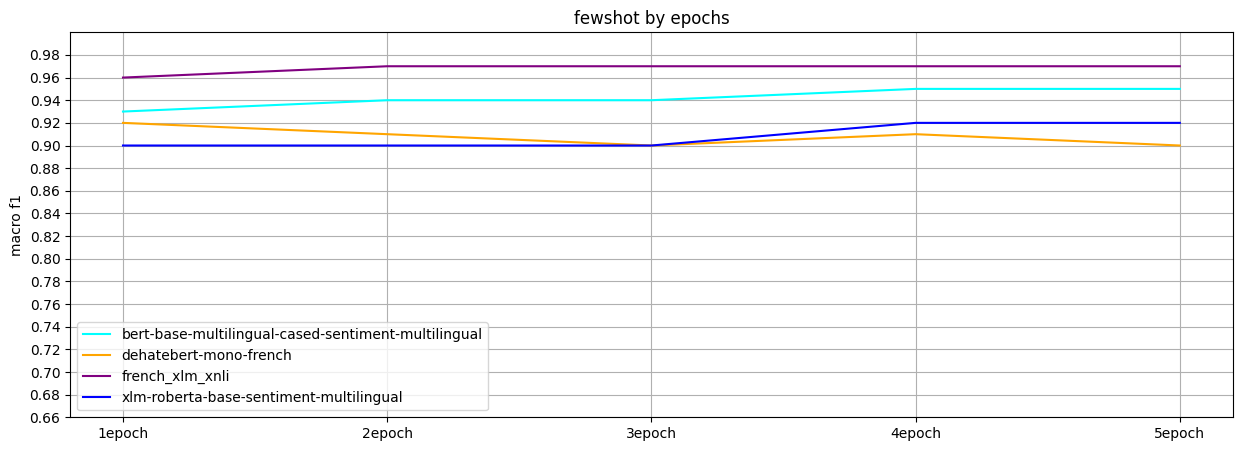

<Figure size 10000x15000 with 0 Axes>

In [62]:
plt.figure(figsize=(15, 5))
plt.ylabel("macro f1")
plt.yticks(np.arange(0.66,1.0,0.02))
plt.ylim(0.66,1.0)
plt.grid()
plt.title("fewshot by epochs")
i = 0
legend_list = []
for key, chart in fewshot_charts.items():
  legend_list.append(key)
  rowlist = list()
  for index, row in chart.iterrows():
    rowlist.append(max(row))

  plt.plot(epochs,rowlist,"-",color=colors[i])
  i+=1

plt.legend(legend_list)
plt.figure(figsize=(100, 150))
plt.show()